In [1]:
import math
from scipy.io import loadmat
from scipy.spatial import distance
import numpy as np
from matplotlib import pyplot as plt
import sys  
sys.path.insert(0, 'data/ShortestPath/')

import Matrix_D as sp
from sklearn.utils.graph import graph_shortest_path
import networkx as nx
from scipy.sparse.linalg import eigs
import pandas as pd
from sklearn.neighbors import kneighbors_graph


In [2]:
# source: https://keestalkstech.com/2020/05/plotting-a-grid-of-pil-images-in-jupyter/
# This method displays face images as a grid.
# I was unable to add the images on the graph, so am printing them on the side

def display_images(
    num=10,
    columns=5, width=20, height=8, max_images=10, 
    label_wrap_length=50, label_font_size=8):
    imageCount, pixelsCount = images.T.shape
    df=pd.DataFrame(images.T)
    
    
    pixelsindim = int(math.sqrt(pixelsCount))

    height = max(height, int(num/columns) * height)
    plt.figure(figsize=(width, height))
    i=0
    for j in range(num):
        img_num = np.random.randint(0, imageCount)
        img = df.iloc[img_num,:].values.reshape(pixelsindim, pixelsindim)
        plt.subplot(num / columns + 1, columns, i + 1)
        plt.imshow(img)
        i+=1
        title="node %s"%img_num
        plt.title(title, fontsize=label_font_size);

In [3]:
# Source: https://stackoverflow.com/questions/29572623/plot-networkx-graph-from-adjacency-matrix-in-csv-file
# This method plots adjacency matrix as a network graph
def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix != 0.)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    fig=plt.figure(figsize=(10,10)) 
    nx.draw(gr, node_size=100, with_labels=True, edge_color='#B0B0B0')
    plt.show()
    display_images()

    

In [4]:
# source: https://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/
# This method plots isomap as scatter plot with faces embedded in them
def drawScatterPlot(z,index,title="Isomap for euclidean distance"):
    z=z.real
    isoMapData = pd.DataFrame(z, columns=['c 2', 'c 1'])
    df=pd.DataFrame(images.T)
    imageCount, pixelsCount = images.T.shape
    pixelsIndim = int(math.sqrt(pixelsCount))
    
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: 1')
    ax.set_ylabel('Component: 2')

    # Show 40 of the images ont the plot
    x_size = (max(isoMapData['c 1']) - min(isoMapData['c 1'])) * 0.08
    y_size = (max(isoMapData['c 2']) - min(isoMapData['c 2'])) * 0.08
    for i in range(40):
        img_num = np.random.randint(0, imageCount)
        x0 = isoMapData.loc[img_num, 'c 1'] - (x_size / 2.)
        y0 = isoMapData.loc[img_num, 'c 2'] - (y_size / 2.)
        x1 = isoMapData.loc[img_num, 'c 1'] + (x_size / 2.)
        y1 = isoMapData.loc[img_num, 'c 2'] + (y_size / 2.)
        img = df.iloc[img_num,:].values.reshape(pixelsIndim, pixelsIndim)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
                  interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # Show 2D components plot
    ax.scatter(isoMapData['c 1'], isoMapData['c 2'], marker='.',alpha=0.7)

In [5]:
def draw_adjacency_matrix(adjacency_matrix):
    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(10, 10)) # in inches
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    plt.show()

(4096, 698)
*** details A ****
Adjacency matrix of shape: (698, 698)


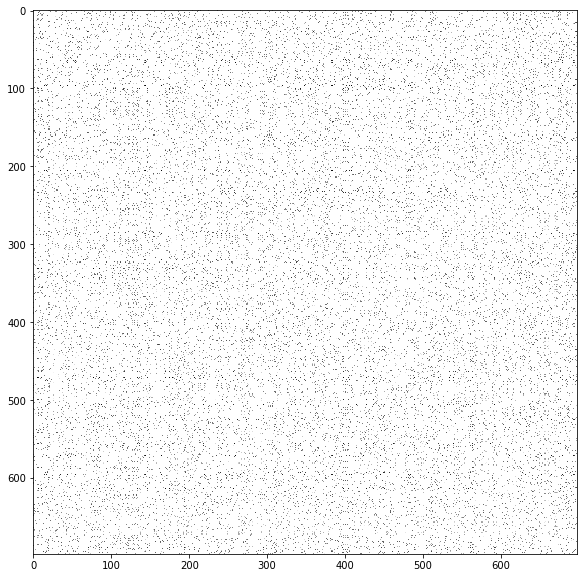

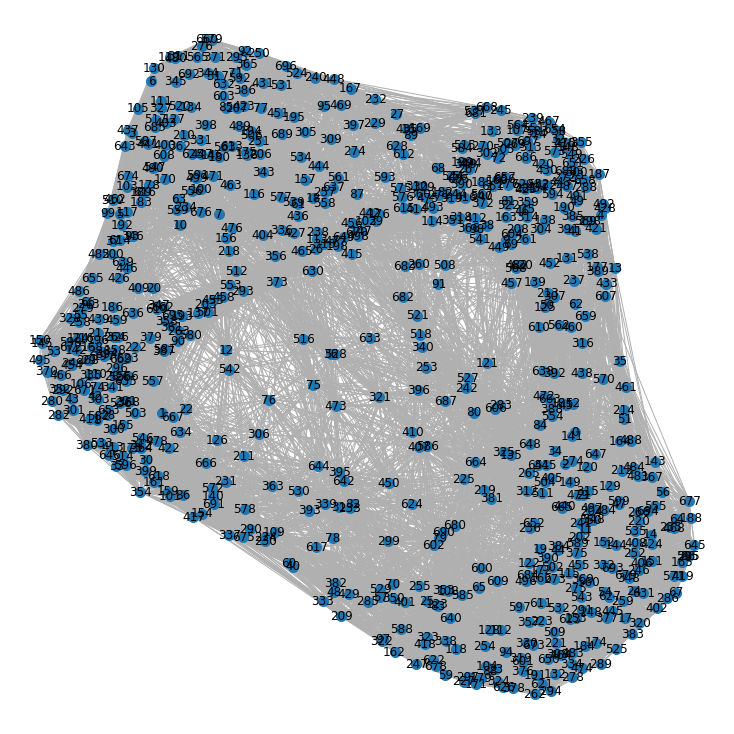

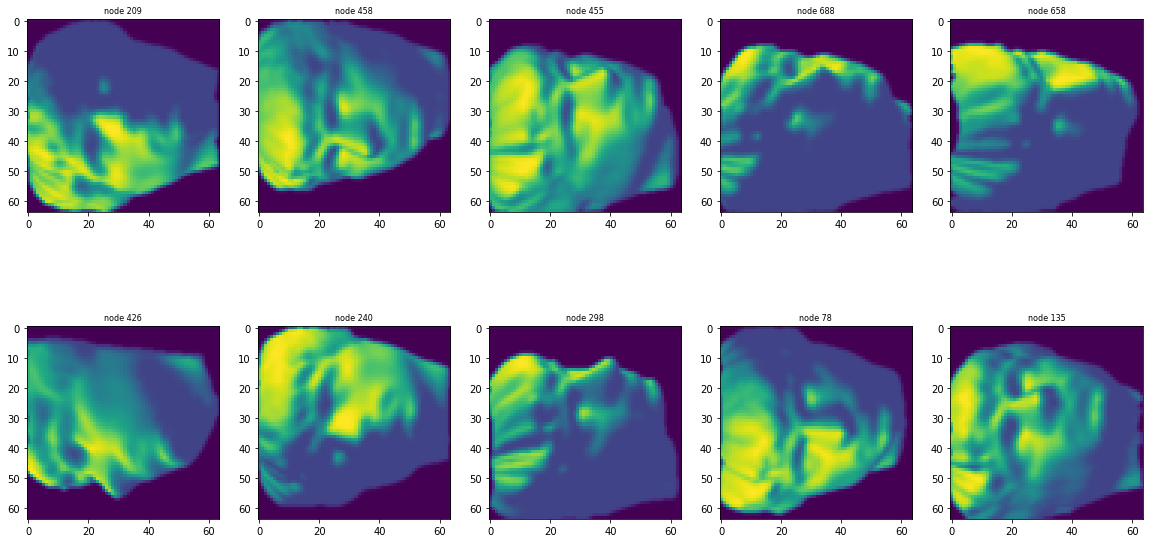

In [6]:
#q1.a: code to print adjacency matrix and plot a network graph

images=loadmat('data/isomap.mat')['images']
print(images.shape)


m,n=images.T.shape

A=kneighbors_graph(images.T,50,mode='distance',metric='euclidean')
A=A.toarray().astype(float)
print("*** details A ****")
print("Adjacency matrix of shape:",A.shape)
draw_adjacency_matrix(A)
show_graph_with_labels(A)


*** details of D ****


array([[ 0.        , 36.81445264,  6.74323967, ..., 38.37208728,
        42.92944356, 22.12792861],
       [35.79581505,  0.        , 35.65572383, ..., 19.38947669,
        31.94099475, 43.63678962],
       [ 6.74323967, 36.86151895,  0.        , ..., 41.56405181,
        37.99022264, 21.9105186 ],
       ...,
       [38.21289582, 25.50792808, 43.38415169, ...,  0.        ,
        42.97281714, 34.58582119],
       [37.79770022, 31.94099475, 37.46881102, ..., 40.40947504,
         0.        , 28.56874432],
       [22.12792861, 44.00676204, 21.9105186 , ..., 32.86808328,
        33.61094962,  0.        ]])

(698, 698)
**** C details *****
[[ 0.50752435 -0.29311327  0.48111232 ... -0.36384742 -0.32799925
   0.35290803]
 [-0.35194931  0.73612675 -0.33861849 ...  0.47997809  0.31972648
  -0.6019695 ]
 [ 0.43729314 -0.33325592  0.47602622 ... -0.58428066 -0.07935411
   0.32210783]
 ...
 [-0.31877799  0.43135441 -0.61488051 ...  0.91059701 -0.11096383
   0.0664994 ]
 [-0.33012935  0.1326592  -0.30623649 ... -0.2930788   1.1779024
   0.30475163]
 [ 0.26344154 -0.60284504  0.27646052 ...  0.02369686  0.28958443
   0.81032269]]
eigen values : [303.10086475 221.12984176]
*** isomap details***
[[ 0.73164404 -0.03533823]
 [-0.72057881 -0.03554422]
 [ 0.68634448 -0.24258927]
 ...
 [-0.55562141  0.7708762 ]
 [-0.52981403 -0.1869635 ]
 [ 0.39033427  0.31566979]]


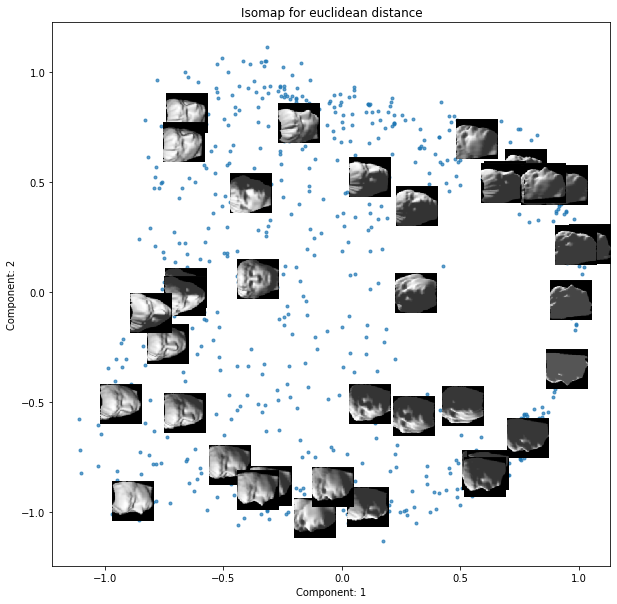

In [7]:
# q1.b: Code to run isomap for euclidean distance
D=graph_shortest_path(A)
print("*** details of D ****")
display(D)
print(D.shape)

I = np.eye(N=D.shape[1])
H = I - 1/m * np.ones(I.shape)

# Compute the C matrix:
C = -1/(2*m) * H @ D**2 @ H
print("**** C details *****")
print(C)

# Compute the eigenvalues and eigenvectors of C and sort them in descending order:
eigenValues, eigenVectors = eigs(C, k=2)
eigenValues=eigenValues.real
eigenVectors=eigenVectors.real
print("eigen values :",eigenValues[:2])

# Normalize the leading eigenvectors:
Z = eigenVectors * np.sqrt(eigenValues)
print("*** isomap details***")
print(Z)

drawScatterPlot(Z,2)
plt.show()

*** details of D ****


array([[   0.        , 1590.47686887,  257.36994485, ..., 1475.7786152 ,
        1761.47800245,  890.07999387],
       [1576.54659926,    0.        , 1571.76559436, ...,  671.17362132,
        1466.35934436, 1645.21473652],
       [ 257.36994485, 1576.26792279,    0.        , ..., 1603.74270833,
        1619.39721201,  897.41136642],
       ...,
       [1548.45085784,  718.41424632, 1710.38213848, ...,    0.        ,
        1803.39227941, 1037.29825368],
       [1523.97898284, 1466.35934436, 1619.39721201, ..., 1681.54249387,
           0.        , 1093.54650735],
       [ 947.30033701, 1648.8004902 ,  908.37166054, ...,  995.19365809,
        1203.25324755,    0.        ]])

(698, 698)
**** C details *****
[[  979.9677822   -725.89920509   952.05336484 ...  -545.76384555
   -521.17781346   501.41920502]
 [ -769.34382615  1117.27905051  -739.02659268 ...   722.79537043
    192.32877731  -838.85941917]
 [  835.72557148  -790.45990112   902.70984827 ...  -924.84048675
   -273.87510199   395.23897383]
 ...
 [ -651.30332786   802.71342429 -1009.7820088  ...  1100.63164914
   -541.93237708   384.4423554 ]
 [ -287.46801983   -57.86302735  -482.78652143 ...  -614.8835283
   2097.71639401   608.56103329]
 [  396.0278817   -802.35232734   467.30984209 ...   363.77048924
    723.22347793  1127.8090495 ]]
eigen values : [445045.89541166 347736.65621263]
*** isomap details***
[[ 30.9325751   -1.15195352]
 [-28.84565696   2.77627652]
 [ 28.24253364 -10.23749415]
 ...
 [-21.76925144  27.73882627]
 [-23.18829618  -2.13559227]
 [  6.63697035  18.33386291]]


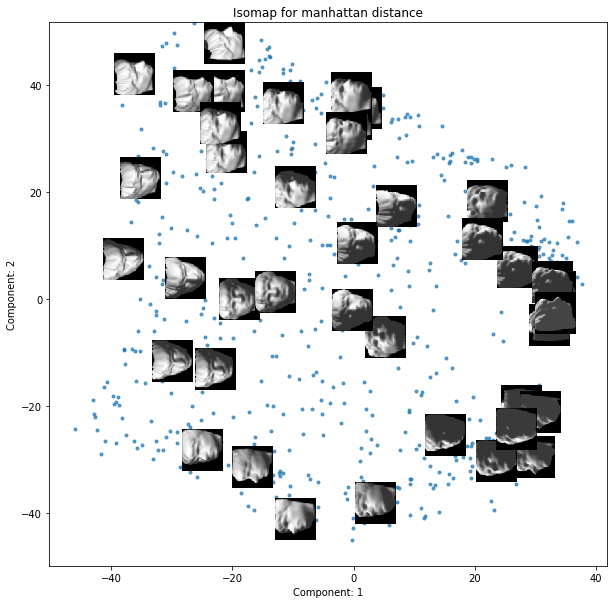

In [8]:
# q1.c code to run isomap for manhattan distance
m,n=images.T.shape

A=kneighbors_graph(images.T,50,mode='distance',p=1,metric='minkowski')
A=A.toarray().astype(float)

D=graph_shortest_path(A)
print("*** details of D ****")
display(D)
print(D.shape)

I = np.eye(N=D.shape[1])
H = I - 1/m * np.ones(I.shape)

# Compute the C matrix:
C = -1/(2*m) * H @ D**2 @ H
print("**** C details *****")
print(C)

# Compute the eigenvalues and eigenvectors of C and sort them in descending order:
eigenValues, eigenVectors = eigs(C, k=2)
eigenValues=eigenValues.real
eigenVectors=eigenVectors.real
print("eigen values :",eigenValues[:2])

# Normalize the leading eigenvectors:
Z = eigenVectors * np.sqrt(eigenValues)
print("*** isomap details***")
print(Z)

drawScatterPlot(Z,2,title="Isomap for manhattan distance")
plt.show()

In [9]:
# Reference: Demo code provided by prof X, along with the hw.

def apply_pca(pca_matrix,K=2):
    m,n= pca_matrix.shape
    mu = np.mean(pca_matrix,axis = 1)
    xc = pca_matrix - mu[:,None]
    C = np.dot(xc,xc.T)/m
    print("---C1----")
    print(C)

    S,W = eigs(C,2)
    S = S.real
    W = W.real
    print ("\n======== Top  Eigen Vectors ==========\n")
    print (W)
    print ("\n======== Top  Eigenvalues ==========\n")
    print (S)
    return S,W

*** details of distances****


array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
        22.79289298, 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ..., 22.82140093,
        23.24040786, 18.68417978],
       ...,
       [21.51126745, 15.07435566, 22.82140093, ...,  0.        ,
        23.3365749 , 17.19515048],
       [22.79289298, 21.63387369, 23.24040786, ..., 23.3365749 ,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

---C1----
[[13.99582915  0.74685118 14.56571246 ... -3.00558668 -3.18077021
   3.70773587]
 [ 0.74685118 15.26490047 -0.82776168 ... 18.59427461  0.136154
   4.37421422]
 [14.56571246 -0.82776168 16.19120044 ... -7.84411074 -4.06809814
   0.8084214 ]
 ...
 [-3.00558668 18.59427461 -7.84411074 ... 43.09176571  1.23221152
  19.89812247]
 [-3.18077021  0.136154   -4.06809814 ...  1.23221152 20.63188708
   7.84308486]
 [ 3.70773587  4.37421422  0.8084214  ... 19.89812247  7.84308486
  23.08388038]]

======== Top  Eigen Vectors ==========

[[-0.00594183  0.03684158]
 [ 0.02986931  0.01825719]
 [-0.01543769  0.03861289]
 ...
 [ 0.07635516  0.01113168]
 [ 0.0074551  -0.05913976]
 [ 0.04278859 -0.01019788]]

======== Top  Eigenvalues ==========

[7015.75375415 3728.94324829]


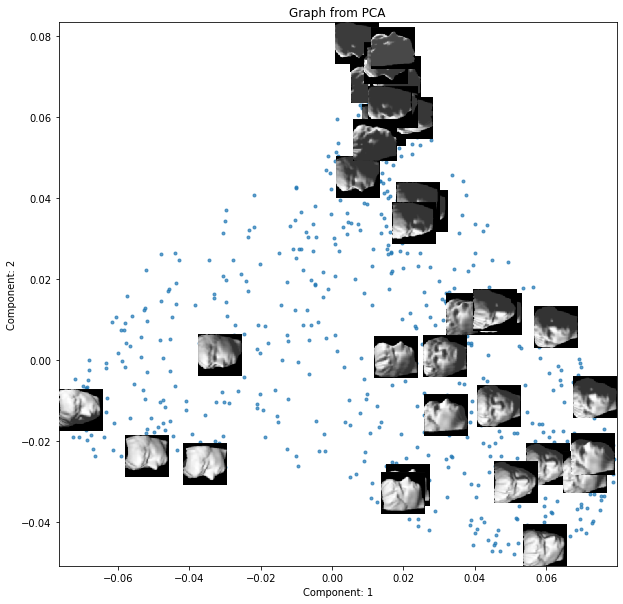

In [10]:
from sklearn.decomposition import PCA
d = distance.cdist(images.T, images.T, 'euclidean')
print("*** details of distances****")
display(d)

S,W=apply_pca(d.T)
drawScatterPlot(W,2,title="Graph from PCA")
plt.show()